In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

## Hierarchal clustering that starts with each point as a cluster and tries to merge them 
# Load training data
data = np.load(species_train.npz')
train_locs = data['train_locs']  # 2D array of lat/long
train_ids = data['train_ids']  # 1D array of species IDs

# Combine locations and IDs into a DataFrame
df_train = pd.DataFrame(train_locs, columns=['latitude', 'longitude'])
df_train['species_id'] = train_ids

#Keep coordinates that are within florida boundaries
df_train_temp = df_train[ (df_train['latitude'] >= 24.27) & (df_train['latitude'] <= 31.20)]
df_train = df_train_temp[ (df_train_temp['longitude'] <= -80.02) & (df_train['longitude'] >= -87.38)]

##print(len(df_train['species_id']))
##print(len(set(df_train['species_id'])))
print(set(df_train['species_id']))


{9602, 40323, 10243, 10373, 19975, 7562, 16782, 35854, 20504, 18204, 4765, 145310, 199841, 26159, 4146, 19765, 4535, 10168, 4793, 4665, 13632, 9152, 11970, 65987, 24266, 73172, 41301, 64985, 74204, 32093, 19182, 42223, 539892, 12024, 9083, 38008}


C:\Users\ishit\AppData\Local\Temp\ipykernel_19196\129386316.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train = df_train_temp[ (df_train_temp['longitude'] <= -80.02) & (df_train['longitude'] >= -87.38)]


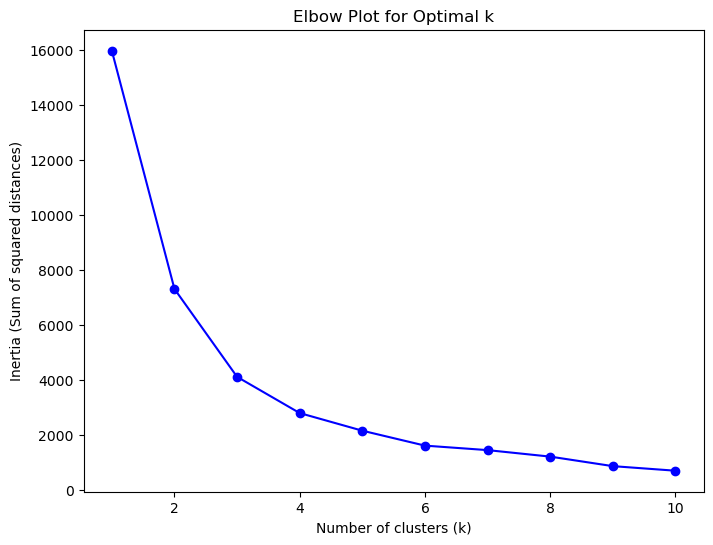

In [25]:
X = df_train[['latitude', 'longitude']]

# Set range for k values to try, e.g., from 1 to 10
k_values = range(1, 11)
inertia_values = []

# Run KMeans for each value of k and store the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto')
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Plot for Optimal k')
plt.show()

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ishit\AppData\Local\Temp\ipykernel_19196\3257659855.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[f'cluster_{n_clusters}'] = kmeans.labels_


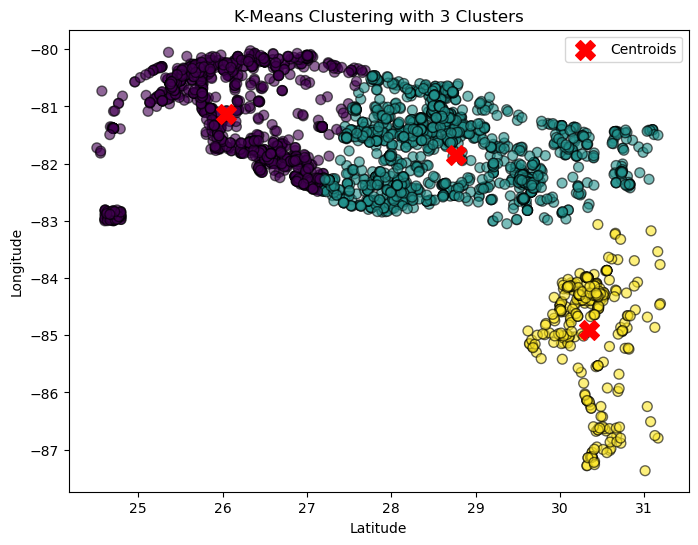

C:\Users\ishit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ishit\AppData\Local\Temp\ipykernel_19196\3257659855.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[f'cluster_{n_clusters}'] = kmeans.labels_


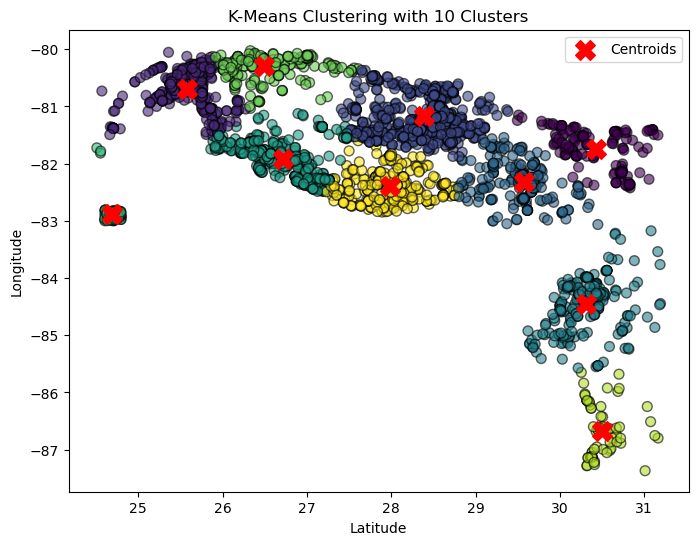

{0: '4535, 4665, 4765, 9083, 9602, 10168, 10243, 11970, 12024, 13632, 16782, 18204, 19765, 26159, 41301, 42223, 64985, 65987, 73172, 74204, 539892',
 1: '4146, 4535, 4665, 4765, 4793, 7562, 9083, 9602, 10243, 10373, 11970, 12024, 13632, 16782, 18204, 19182, 19765, 19975, 26159, 32093, 41301, 42223, 64985, 145310, 539892',
 2: '4146, 4535, 4665, 4765, 4793, 7562, 9083, 9602, 10168, 10243, 10373, 11970, 12024, 13632, 16782, 18204, 19765, 19975, 26159, 40323, 41301, 42223, 64985, 73172, 539892',
 3: '4665, 4765, 4793, 7562, 9083, 9152, 9602, 10168, 10243, 10373, 11970, 12024, 13632, 16782, 18204, 19765, 19975, 24266, 26159, 40323, 41301, 42223, 64985, 65987, 73172, 145310, 199841, 539892',
 4: '4765, 4793, 7562, 9083, 9602, 10168, 10373, 11970, 12024, 13632, 16782, 18204, 19975, 24266, 26159, 41301, 42223, 64985, 65987, 73172, 145310, 199841, 539892',
 5: '4665, 4765, 4793, 7562, 9083, 9602, 10243, 10373, 12024, 13632, 16782, 18204, 19765, 19975, 26159, 41301, 42223, 64985, 73172, 74204, 

In [27]:
def plot_clusters(X, n_clusters):
    # Initialize and fit k-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    
    # Add the cluster labels to the DataFrame
    df_train[f'cluster_{n_clusters}'] = kmeans.labels_
    
    # Plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X['latitude'], X['longitude'], c=kmeans.labels_, cmap='viridis', marker='o', s=50, alpha=0.6, edgecolor='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title(f'K-Means Clustering with {n_clusters} Clusters')
    plt.legend()
    plt.show()

    clusters = {}
    for cluster_id in range(n_clusters):
        # Extract unique species IDs for the current cluster, sort them, and join as a single string
        unique_species_ids = set(df_train[df_train[f'cluster_{n_clusters}'] == cluster_id]['species_id'])
        clusters[cluster_id] = ", ".join(map(str, sorted(unique_species_ids)))
    
    return clusters

# Perform clustering and plot for 3 clusters
plot_clusters(X, n_clusters=3)

# Perform clustering and plot for 10 clusters
plot_clusters(X, n_clusters=10)